**The notebook carries out clinical data processing for the TCGA-BRCA dataset by extracting relevant .tsv files, loading them into DataFrames, and performing initial explorations to check for their structure and content. It cleans the data by dropping columns with more than 50% of missing values, then analyzes the numeric features through correlation matrices presented as heatmaps for potentially revealing relationships. Lastly, it lists column names for further validations. The main purpose is likely to prepare and understand clinical information for further use, which could either be in the form of research or predictive modeling in breast cancer studies.**

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

**Data Understanding and Loading**

In [ ]:

clinical_path = 'Data/Clinical_Data/clinical.tsv'
pathology_path = 'Data/Clinical_Data/pathology_detail.tsv'
follow_up_path = 'Data/Clinical_Data/follow_up.tsv'
exposure_path = 'Data/Clinical_Data/exposure.tsv'
family_history_path = 'Data/Clinical_Data/family_history.tsv'

clinical_df = pd.read_csv(clinical_path, sep='\t')
pathology_df = pd.read_csv(pathology_path, sep='\t')
follow_up_df = pd.read_csv(follow_up_path, sep='\t')
exposure_df = pd.read_csv(exposure_path, sep='\t')
family_history_df = pd.read_csv(family_history_path, sep='\t')

print(clinical_df.info())
print(pathology_df.info())
print(follow_up_df.info())
print(exposure_df.info())
print(family_history_df.info())


<ipython-input-6-26ee85634ca4>:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  clinical_df = pd.read_csv(clinical_path, sep='\t')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Columns: 210 entries, project.project_id to treatments.treatment_type
dtypes: object(210)
memory usage: 8.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 86 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   project.project_id                                          1096 non-null   object
 1   cases.case_id                                               1096 non-null   object
 2   cases.submitter_id                                          1096 non-null   object
 3   diagnoses.diagnosis_id                                      1096 non-null   object
 4   diagnoses.submitter_id                                      1096 non-null   object
 5   pathology_details.additional_pathology_findings             1096 non-null   objec

**1. clinical.tsv:**

Contains 5,546 rows and 210 columns of clinical data.

A warning (DtypeWarning) indicates mixed data types in Column 10, suggesting some values are inconsistently formatted (e.g., strings and numbers mixed together).

This dataset holds the primary clinical information for each patient.

**2. family_history.tsv:**

Contains 0 rows and 13 columns, indicating the file is empty or failed to load properly.

Intended to hold family history details, but currently, there is no data available for analysis.

**3. exposure.tsv:**

Contains just 1 row and 40 columns.

This file includes data about patient exposures (like smoking, radiation, etc.), but the single row suggests very limited information was captured.

**4. pathology_detail.tsv:**

Contains 1,096 rows and 86 columns.

This dataset provides pathology-specific details for patients, which may include tumor characteristics and histopathological findings.

**5. follow_up.tsv:**

Contains 9,427 rows and 198 columns.

This is the largest of the datasets, tracking follow-up visits and longitudinal patient data over time.

**Data Cleaning**: handle missing values, drop columns with excessive missing data, and convert data types where needed.

In [7]:
for df in [clinical_df, pathology_df, follow_up_df, exposure_df, family_history_df]:
    df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.drop_duplicates(inplace=True)

<ipython-input-7-13c604b54a78>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-13c604b54a78>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-13c604b54a78>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-13c604b54a78>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-13c604b54a78>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj

**Exploratory Data Analysis (EDA)**

In [25]:
age_columns = [col for col in clinical_df.columns if 'age' in col.lower()]
print(age_columns)
age_columns = [col for col in clinical_df.columns if 'gender' in col.lower()]
print(age_columns)

['demographic.age_at_index', 'demographic.age_is_obfuscated', 'diagnoses.age_at_diagnosis', 'diagnoses.ajcc_clinical_stage', 'diagnoses.ajcc_pathologic_stage', 'diagnoses.ann_arbor_clinical_stage', 'diagnoses.ann_arbor_pathologic_stage', 'diagnoses.cog_liver_stage', 'diagnoses.cog_renal_stage', 'diagnoses.enneking_msts_stage', 'diagnoses.ensat_pathologic_stage', 'diagnoses.esophageal_columnar_dysplasia_degree', 'diagnoses.esophageal_columnar_metaplasia_present', 'diagnoses.figo_stage', 'diagnoses.gastric_esophageal_junction_involvement', 'diagnoses.igcccg_stage', 'diagnoses.inrg_stage', 'diagnoses.inss_stage', 'diagnoses.irs_stage', 'diagnoses.iss_stage', 'diagnoses.masaoka_stage', 'diagnoses.uicc_clinical_stage', 'diagnoses.uicc_pathologic_stage', 'treatments.embolic_agent', 'treatments.radiosensitizing_agent', 'treatments.therapeutic_agents']
['demographic.gender']
['diagnoses.ajcc_serum_tumor_markers', 'diagnoses.classification_of_tumor', 'diagnoses.enneking_msts_tumor_site', 'diagn

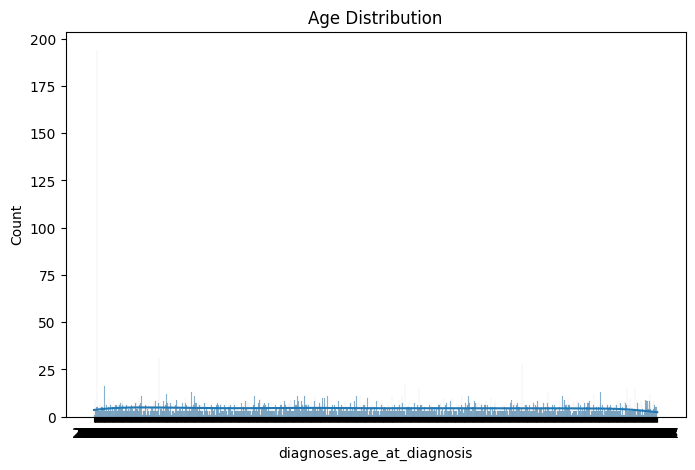

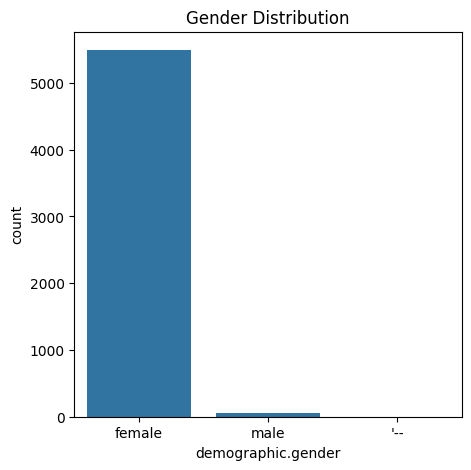

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(clinical_df['diagnoses.age_at_diagnosis'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(5, 5))
sns.countplot(data=clinical_df, x='demographic.gender')
plt.title('Gender Distribution')
plt.show()


**Tumor Stage Analysis**

In [35]:
age_columns = [col for col in clinical_df.columns if 'tumor' in col.lower()]
print(age_columns)

['diagnoses.ajcc_serum_tumor_markers', 'diagnoses.classification_of_tumor', 'diagnoses.enneking_msts_tumor_site', 'diagnoses.max_tumor_bulk_site', 'diagnoses.tumor_burden', 'diagnoses.tumor_confined_to_organ_of_origin', 'diagnoses.tumor_depth', 'diagnoses.tumor_focality', 'diagnoses.tumor_grade', 'diagnoses.tumor_grade_category', 'diagnoses.tumor_of_origin', 'diagnoses.tumor_regression_grade', 'diagnoses.wilms_tumor_histologic_subtype']


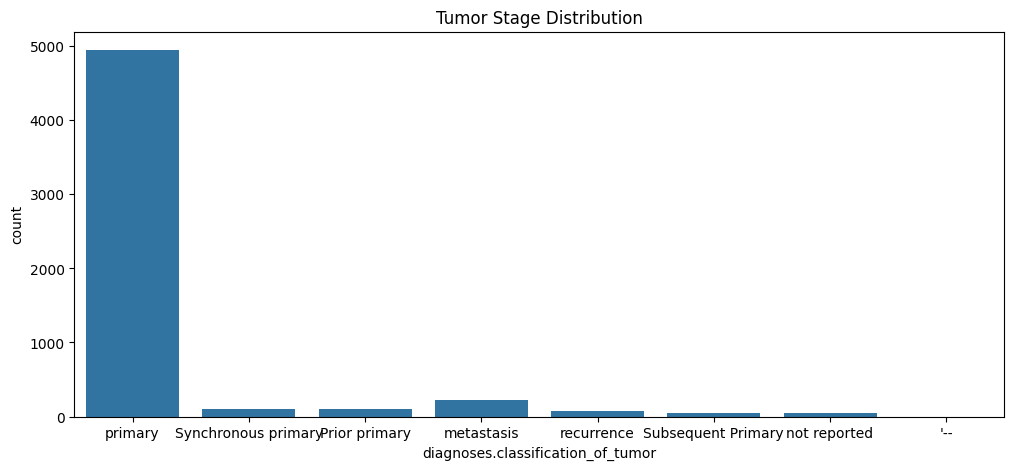

In [34]:
plt.figure(figsize=(12, 5))
sns.countplot(data=clinical_df, x='diagnoses.classification_of_tumor')
plt.title('Tumor Distribution')
plt.show()


**Survival Status**

In [36]:
age_columns = [col for col in clinical_df.columns if 'vital_status' in col.lower()]
print(age_columns)

['demographic.vital_status']


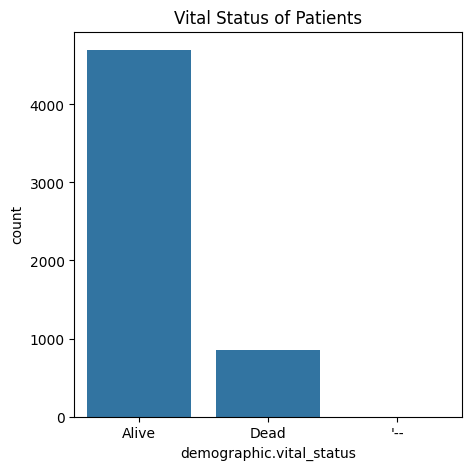

In [37]:
plt.figure(figsize=(5, 5))
sns.countplot(data=clinical_df, x='demographic.vital_status')
plt.title('Vital Status of Patients')
plt.show()


**Correlation Analysis**

In [42]:
numeric_df = clinical_df.select_dtypes(include=['number'])

print(numeric_df.info())
print(numeric_df.head())
print(clinical_df.select_dtypes(include=['number']).columns)

for col in clinical_df.columns:
    clinical_df[col] = pd.to_numeric(clinical_df[col], errors='coerce')

print(clinical_df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Empty DataFrame
None
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Index([], dtype='object')
project.project_id                       float64
cases.case_id                            float64
cases.consent_type                       float64
cases.days_to_consent                    float64
cases.days_to_lost_to_followup           float64
                                          ...   
treatments.treatment_intent_type         float64
treatments.treatment_or_therapy          float64
treatments.treatment_outcome             float64
treatments.treatment_outcome_duration    float64
treatments.treatment_type                float64
Length: 210, dtype: object


**Check for columns with all NaNs and the total number of NaNs in each column**

In [46]:
print(clinical_df.isna().all())
print(clinical_df.isna().sum())

numeric_df = clinical_df.dropna(axis=1, how='all')
numeric_df = numeric_df.select_dtypes(include=['number'])

project.project_id                        True
cases.case_id                             True
cases.consent_type                        True
cases.days_to_consent                    False
cases.days_to_lost_to_followup            True
                                         ...  
treatments.treatment_intent_type          True
treatments.treatment_or_therapy           True
treatments.treatment_outcome              True
treatments.treatment_outcome_duration     True
treatments.treatment_type                 True
Length: 210, dtype: bool
project.project_id                       5546
cases.case_id                            5546
cases.consent_type                       5546
cases.days_to_consent                      67
cases.days_to_lost_to_followup           5546
                                         ... 
treatments.treatment_intent_type         5546
treatments.treatment_or_therapy          5546
treatments.treatment_outcome             5546
treatments.treatment_outcome_duration    554

**Plot the heatmap**

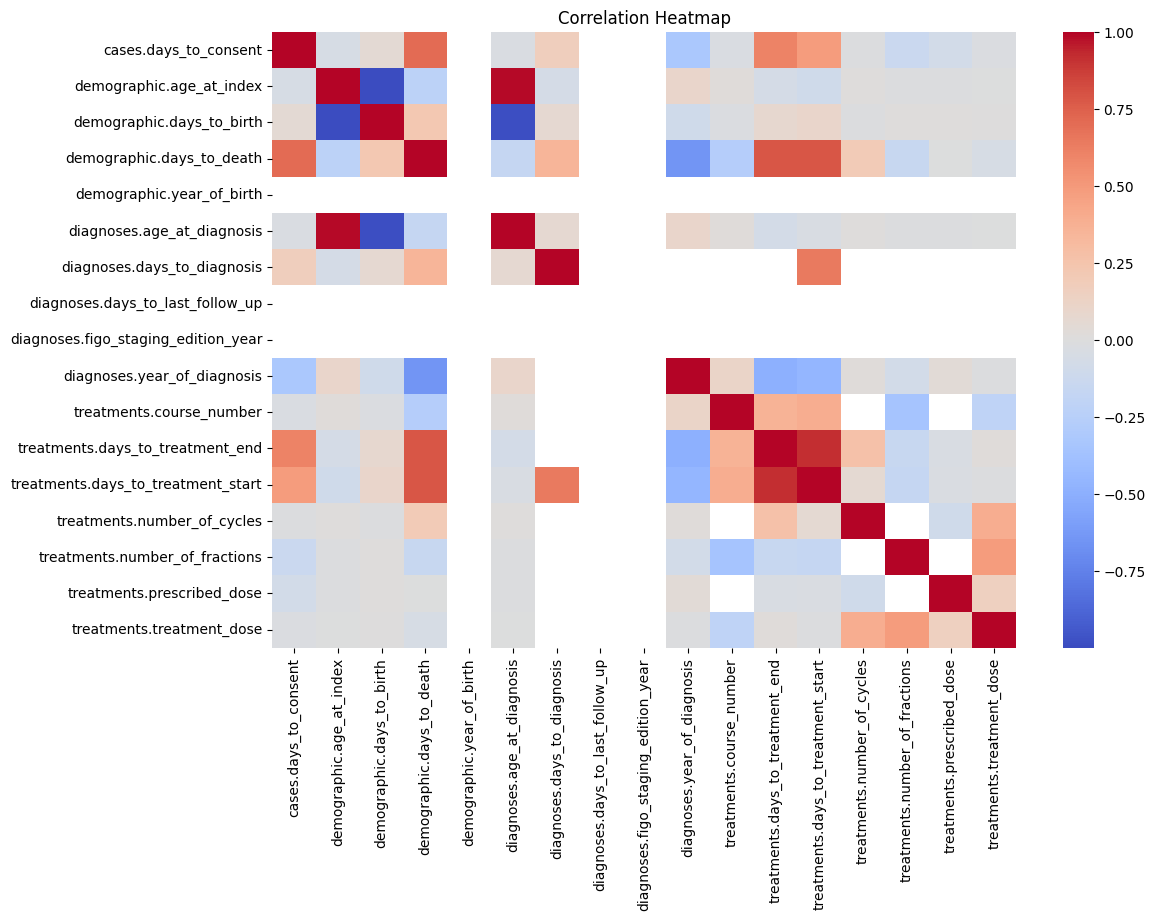

In [45]:
if not numeric_df.empty:
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns with valid data found.")


**Multi-Dataset Analysis (Merging)**

In [64]:
age_columns = [col for col in clinical_df.columns if 'id' in col.lower()]
print(age_columns)

['project.project_id', 'cases.case_id', 'cases.submitter_id', 'demographic.country_of_residence_at_enrollment', 'demographic.demographic_id', 'demographic.submitter_id', 'diagnoses.diagnosis_id', 'diagnoses.pediatric_kidney_staging', 'diagnoses.peritoneal_fluid_cytological_status', 'diagnoses.residual_disease', 'diagnoses.submitter_id', 'treatments.protocol_identifier', 'treatments.residual_disease', 'treatments.submitter_id', 'treatments.treatment_id']


In [67]:
print(clinical_df['cases.case_id'].dtype)
print(follow_up_df['cases.case_id'].dtype)
print(pathology_df['cases.case_id'].dtype)
print(exposure_df['cases.case_id'].dtype)
clinical_df['cases.case_id'] = clinical_df['cases.case_id'].astype(str)
follow_up_df['cases.case_id'] = follow_up_df['cases.case_id'].astype(str)
pathology_df['cases.case_id'] = pathology_df['cases.case_id'].astype(str)
exposure_df['cases.case_id'] = exposure_df['cases.case_id'].astype(str)


float64
object
object
object


In [73]:
merged_df = pd.merge(clinical_df, follow_up_df, on='cases.case_id', how='inner')
merged_df = pd.merge(merged_df, pathology_df, on='cases.case_id', how='inner')
merged_df = pd.merge(merged_df, exposure_df, on='cases.case_id', how='left', suffixes=('_merged', '_exposure'))

print(merged_df.info())
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Columns: 531 entries, project.project_id_x to exposures.years_smoked
dtypes: float64(209), object(322)
memory usage: 132.0+ bytes
None
Empty DataFrame
Columns: [project.project_id_x, cases.case_id, cases.consent_type, cases.days_to_consent, cases.days_to_lost_to_followup, cases.disease_type, cases.index_date, cases.lost_to_followup, cases.primary_site, cases.submitter_id_x, demographic.age_at_index, demographic.age_is_obfuscated, demographic.cause_of_death, demographic.cause_of_death_source, demographic.country_of_birth, demographic.country_of_residence_at_enrollment, demographic.days_to_birth, demographic.days_to_death, demographic.demographic_id, demographic.education_level, demographic.ethnicity, demographic.gender, demographic.marital_status, demographic.occupation_duration_years, demographic.population_group, demographic.premature_at_birth, demographic.race, demographic.submitter_id, demographic.vital_status, demographic.